In [21]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

## Generate Data

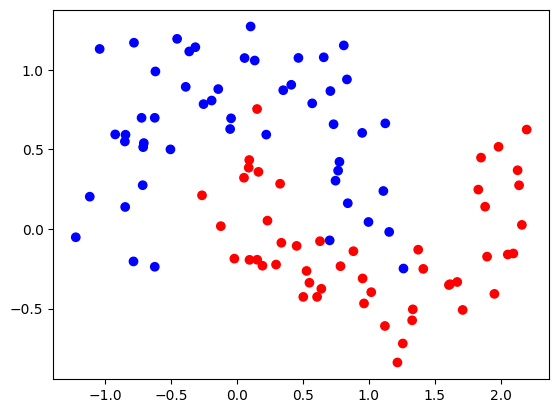

In [8]:
x_train, y_train = make_moons(noise = 0.2)
x_valid, y_valid = make_moons(noise = 0.2) #Validation set
x_train.shape #Default: 100 values in 2-space
plt.scatter(x_train[:,0],x_train[:,1], c= y_train, cmap='bwr')

## K-means Classification

In [10]:
k = 5
kmeans = KMeans(n_clusters = k)
kmeans.fit(x_train)
print(kmeans.cluster_centers_)
print(kmeans.predict(x_train))

[[-0.60237523  0.69463192]
 [ 1.92408774  0.01306015]
 [ 0.55656146  0.81260891]
 [ 0.03879109  0.02364051]
 [ 0.96558758 -0.29060281]]
[0 3 2 3 3 3 2 0 1 4 4 0 0 4 2 0 1 4 1 4 2 0 3 3 4 3 1 0 2 4 3 4 2 2 4 3 2
 2 1 3 2 0 4 2 4 2 4 2 0 0 3 0 0 1 0 4 3 3 3 2 3 0 4 4 4 1 0 1 2 0 4 1 1 4
 0 1 0 0 0 2 4 4 4 0 0 0 4 4 1 1 1 1 2 2 4 2 3 3 0 1]


### Defines/separates the regions amongst the clusters

In [13]:
x0_values = np.linspace(-1.5,2.5,100)
x1_values = np.linspace(-1,1.5,100)
coords = np.asarray(np.meshgrid(x0_values,x1_values)).T.reshape(-1,2)
coords

array([[-1.5       , -1.        ],
       [-1.5       , -0.97474747],
       [-1.5       , -0.94949495],
       ...,
       [ 2.5       ,  1.44949495],
       [ 2.5       ,  1.47474747],
       [ 2.5       ,  1.5       ]])

### Visualizing where the clusters are amongst the graph/dataset

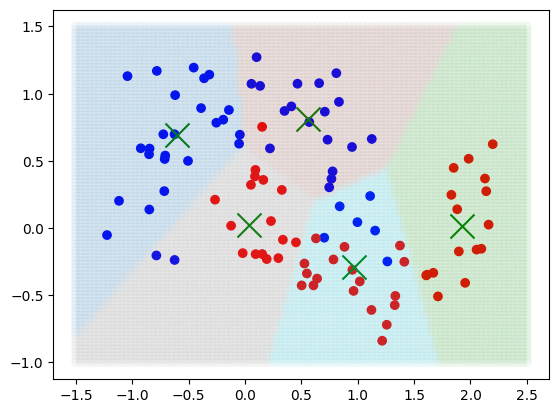

In [14]:
plt.scatter(x_train[:,0],x_train[:,1], c= y_train, cmap='bwr')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='g', marker = 'x', s= 300)
plt.scatter(coords[:,0], coords[:,1], c = kmeans.predict(coords),cmap='tab10', alpha =0.04)

### Labeling clusters

To differentiate what each cluster is called, we will use the most frequent appearing label

In [20]:
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    #print(counts)
    label =counts.most_common()[0][0]
    cluster_y[i] = label
cluster_y

{0: 0, 1: 1, 2: 0, 3: 1, 4: 1}

## Testing and Validation

In [23]:
pred_train = []
for el in kmeans.predict(x_train):
    pred_train.append(cluster_y[el])

#pred_train = [cluster_y[el] for el in kmeans.predict(x_train)]

train_accuracy = accuracy_score(y_train, pred_train)

pred_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
train_acc_v = accuracy_score(y_valid, pred_valid)

print(train_accuracy)
print(train_acc_v)

0.91
0.9


In [24]:
for k in range(2,20):
    #Cluster
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x_train)

    #Mapping which label each cluster is in
    cluster_y = {}
    for i in range(k):
        counts = Counter(y_train[kmeans.labels_==i])
        label =counts.most_common()[0][0]
        cluster_y[i] = label

    #Evaluate results
    pred_train = [cluster_y[el] for el in kmeans.predict(x_train)]
    train_accuracy = accuracy_score(y_train, pred_train)
    pred_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
    train_acc_v = accuracy_score(y_valid, pred_valid)

    print(k, train_accuracy, train_acc_v)

2 0.74 0.76
3 0.77 0.77
4 0.85 0.85
5 0.87 0.86
6 0.88 0.88
7 0.97 0.94
8 0.9 0.88
9 0.92 0.88
10 0.96 0.94
11 0.89 0.88
12 0.94 0.92
13 0.95 0.92
14 0.96 0.94
15 0.92 0.91
16 0.93 0.9
17 0.95 0.94
18 0.94 0.93
19 0.95 0.94


Comparing values I want to test by picking the 'best' amount of clusters arbitrarily. We can say having 10 or 14 clusters gives us the best accuracy, I will choose 10.

In [25]:
k = 10
kmeans = KMeans(n_clusters = k)
kmeans.fit(x_train)

cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label =counts.most_common()[0][0]
    cluster_y[i] = label

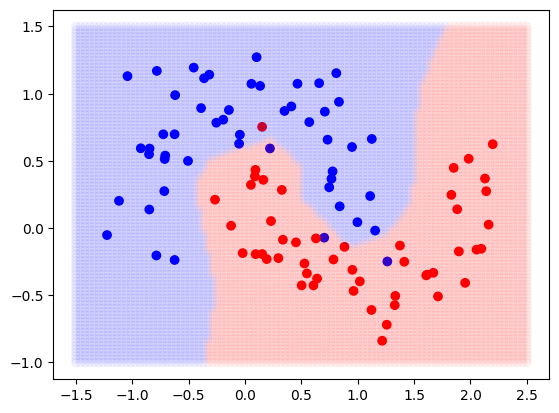

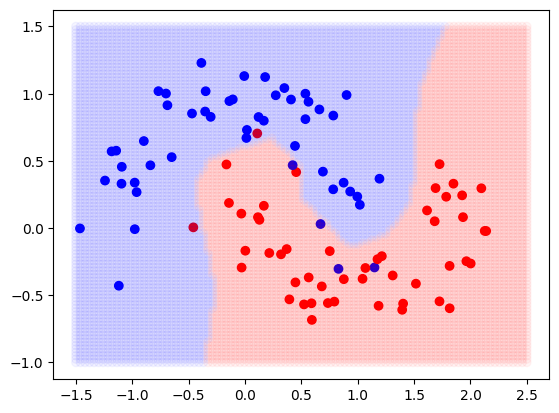

In [27]:
pred_coords = [cluster_y[el] for el in kmeans.predict(coords)]
plt.scatter(x_train[:,0],x_train[:,1], c= y_train, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c = pred_coords,cmap='bwr', alpha =0.04)
plt.show()

plt.scatter(x_valid[:,0],x_valid[:,1], c= y_valid, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c = pred_coords,cmap='bwr', alpha =0.04)
plt.show()

The following is an independent third test because above, we used the validation set to arbitrarily set the amount of clusters we wanted to use. So we will make a new data set and test it.

0.97


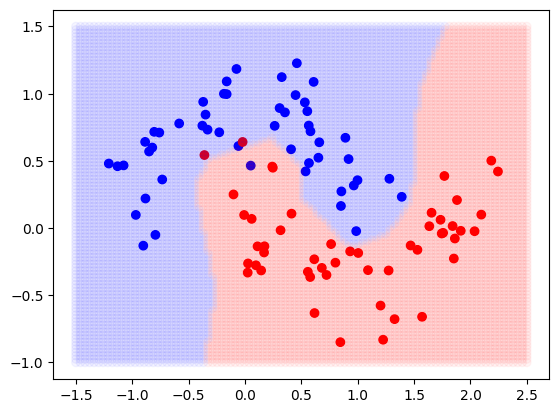

In [31]:
x_test, y_test = make_moons(noise = 0.2)
pred_test = [cluster_y[el] for el in kmeans.predict(x_test)]
train_test = accuracy_score(y_test, pred_test)
print(train_test)
plt.scatter(x_test[:,0],x_test[:,1], c= y_test, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c = pred_coords,cmap='bwr', alpha =0.04)
plt.show()